# Downgrade the dimension of an image

Install dependencies

In [1]:
! pip install matplotlib
! pip install opencv-python
! pip install pydub

Import libraries

In [2]:
import matplotlib.pyplot as plt
import requests # to get image from the web
import shutil # to save it locally
import numpy as np
from sklearn.preprocessing import StandardScaler
from google.colab.patches import cv2_imshow
import cv2

Download image

In [3]:
## Set up the image URL and filename
image_url = "https://cdn.pixabay.com/photo/2020/02/06/09/39/summer-4823612_960_720.jpg"
filename = 'image.jpg'

# Open the url image, set stream to True, this will return the stream content.
r = requests.get(image_url, stream = True)

# Check if the image was retrieved successfully
if r.status_code == 200:
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
    r.raw.decode_content = True
    
    # Open a local file with wb ( write binary ) permission.
    with open(filename,'wb') as f:
        shutil.copyfileobj(r.raw, f)
else:
    print('Image Couldn\'t be retreived')

Load image grey scale using PIL (Pillow) and preserve the alpha (Transparent)

In [4]:
image = cv2.imread('/content/image.jpg', 0)
image

array([[147, 154, 112, ...,  18,  17,  21],
       [170, 150, 162, ...,  17,  17,  20],
       [132, 145, 103, ...,  16,  17,  19],
       ...,
       [ 36,  39,  40, ...,  39,  38,  38],
       [ 36,  39,  41, ...,  38,  37,  37],
       [ 34,  38,  40, ...,  37,  37,  37]], dtype=uint8)

**Show image**

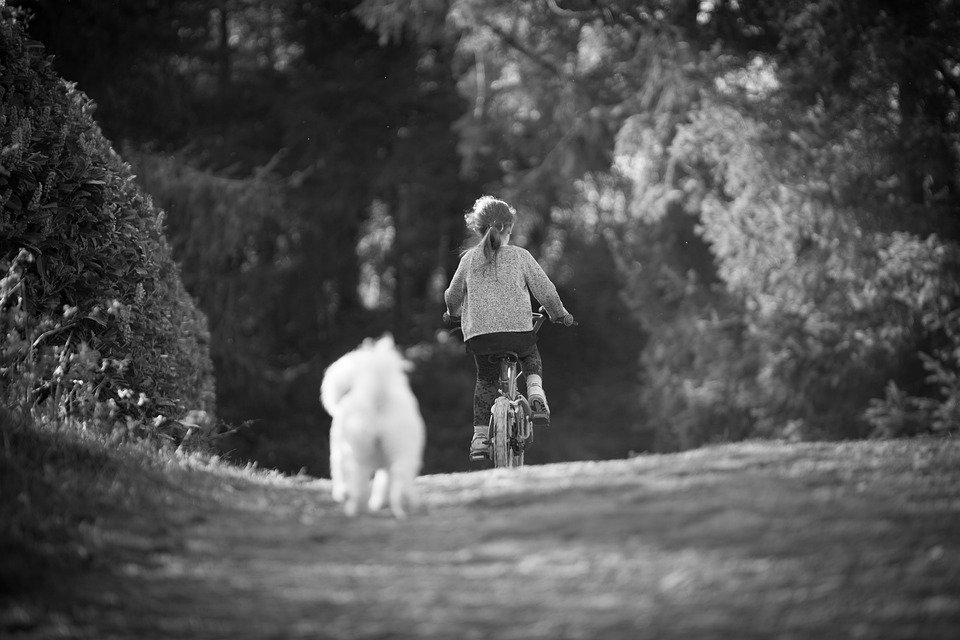

In [5]:
cv2_imshow(image)

Load Image into numpy array

In [6]:
imgArr=np.array(image) #load image into arr
imgArr

array([[147, 154, 112, ...,  18,  17,  21],
       [170, 150, 162, ...,  17,  17,  20],
       [132, 145, 103, ...,  16,  17,  19],
       ...,
       [ 36,  39,  40, ...,  39,  38,  38],
       [ 36,  39,  41, ...,  38,  37,  37],
       [ 34,  38,  40, ...,  37,  37,  37]], dtype=uint8)

PCA Reduction

In [7]:
from sklearn import decomposition
pcaImg = decomposition.PCA(n_components=32)
reduction_arr=pcaImg.fit_transform(imgArr)
reduction_arr

array([[-825.6160611 ,  276.88609245, -761.12669317, ...,   80.88078233,
        -100.61424646,  -85.05861447],
       [-831.36324133,  277.18917118, -749.69473078, ...,   80.05868261,
         -89.15489547,  -70.27484723],
       [-831.1626922 ,  276.6867969 , -739.2869585 , ...,   75.01452847,
         -64.05436549,  -55.69422909],
       ...,
       [-198.64459953,   51.61424621, -415.44795942, ...,  -10.91683095,
          12.2601199 ,   37.88627094],
       [-233.8229205 ,   76.79369497, -403.93403169, ...,   -6.99361514,
          19.02189602,   31.78438544],
       [-256.1593406 ,   96.86145694, -395.84400844, ...,   -8.0067044 ,
          24.48779218,   35.78563582]])

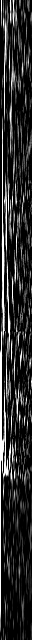

In [8]:
cv2_imshow(reduction_arr)

Inverse Image ( reconstruct)

In [9]:
reduction_arr=pcaImg.inverse_transform(reduction_arr)
reduction_arr

array([[ 97.0231861 ,  98.84695523, 102.25345421, ...,  12.77211963,
         12.73908842,  15.66057222],
       [ 97.34395558, 100.25875018, 104.43417231, ...,  12.06194894,
         12.19448572,  15.08464277],
       [ 98.2863238 , 100.46100188, 103.1183275 , ...,  13.04208441,
         12.86172404,  15.34137569],
       ...,
       [ 41.16223067,  44.29294687,  43.74046985, ...,  43.62683561,
         41.41661661,  39.04080101],
       [ 42.37386306,  44.8086841 ,  44.33825004, ...,  42.67417654,
         40.96989505,  39.07183972],
       [ 41.54751111,  43.42061761,  43.03516535, ...,  41.48835504,
         40.30165628,  38.99171612]])

Show image after reconstruct

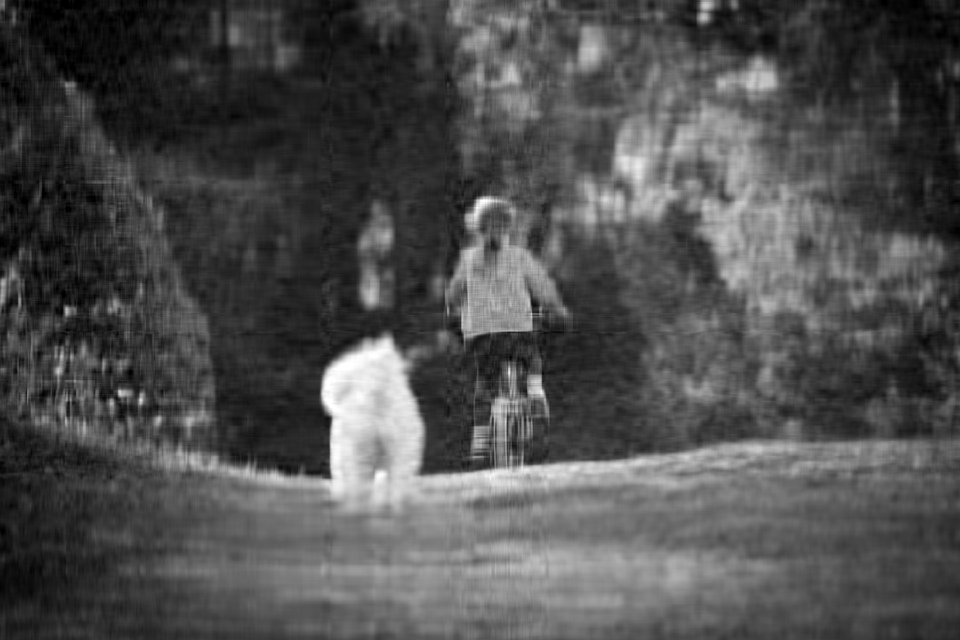

In [10]:
cv2_imshow(reduction_arr)

# PCA an Audio using sklearn and reshape

Import libraries

In [11]:
from pydub import AudioSegment

Load an audio file

In [12]:
sound = AudioSegment.from_wav('/content/PinkPanther30.wav')
sound

FileNotFoundError: ignored

In [ ]:
soundArr=sound.get_array_of_samples()
soundArr

Sound shape

In [ ]:
soundNpArray=np.array(soundArr)
soundNpArray

Reshape sound

In [ ]:
sound_reshape=soundNpArray.reshape(500,1323)
sound_reshape

Decomposition of sound

In [ ]:
pcaSound = decomposition.PCA(n_components=50)
reduction_sound_arr=pcaSound.fit_transform(sound_reshape)
reduction_sound_arr

Convert from numpy array to sound

In [ ]:
reduced_sound=pcaSound.inverse_transform(reduction_sound_arr)
reduced_sound

In [ ]:
from IPython.display import Audio
Audio(data=reduction_sound_arr,rate=1)

# Right solution

In [ ]:
from scipy.io import wavfile
import IPython.display as ipd
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
def read_audio(filename):
  samplerate, audio = wavfile.read(filename)
  return samplerate, audio

In [ ]:
def pca_audio(audio, n_components = 32, block_size = 512):
  if len(audio.shape) == 2:
    audio = audio[:, 0] # Âm thanh với 2 kênh thì lấy ra 1 kênh
  audio = audio.astype(np.float64)
  padding = audio.shape[0] % block_size
  zeros = np.zeros(block_size - padding)
  audio = np.concatenate((audio, zeros))
  padded_len = audio.shape[0]
  audio = audio.reshape(-1, block_size)

  pca = PCA(n_components=n_components)
  pca.fit(audio)
  transformed = pca.transform(audio)
  reconstructed = pca.inverse_transform(transformed).reshape(padded_len)
  return reconstructed

In [ ]:
filename = '/content/PinkPanther30.wav'
ipd.Audio(filename)

In [ ]:
samplerate, audio = read_audio(filename1)
reconstructed = pca_audio(audio, n_components=20)
ipd.Audio(data=reconstructed, rate=samplerate)